# Mapserver / Mapfile

In [29]:
from glob import glob
from IPython.display import display, HTML
from matplotlib import pyplot as plt

import fiona
import geopandas as gpd
import numpy as np
import os
import rasterio
import rasterio.plot
import rasterio.mask
# local
import AlertaDengue as alert_dengue

## Setting variables

In [91]:
shp_path = '%s/static/shapefile' % alert_dengue.__path__[0]
raster_dir_path = os.path.join(
    os.path.dirname(alert_dengue.__path__[0]),
    'tiffs'
)

# mapserver variables
ms_error_path = '/home/xmn/alerta_dengue_ms.log'
ms_cgi_path = 'http://localhost:81/cgi-bin/mapserv?map=%s&'
ms_mapfile_name = '%s.map'
ms_mapfile_dir = '%s/mapfiles/%%s' % (
    os.path.dirname(alert_dengue.__path__[0])
)

In [3]:
# Rio de Janeiro's conf
geocode = 3304557
city_name = 'Rio de Janeiro'
alert_level = 2
disease = 'dengue'

## Check Shapefile

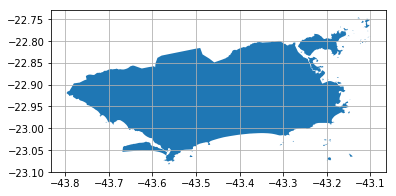

In [4]:
shapefile_path = os.path.join(shp_path, '%s.shp' % geocode)
gdf = gpd.GeoDataFrame.from_file(shapefile_path)
gdf.plot()

plt.grid(True)
plt.show()

In [5]:
# boundaries
gdf.bounds

,minx,miny,maxx,maxy
0,-43.796539,-23.082893,-43.099039,-22.74602


In [6]:
str_boundaries = [str(v) for v in gdf.bounds.iloc[0].values]
extent = ' '.join(str_boundaries)
extent_url = ','.join(str_boundaries)

In [7]:
# crs/srs
gdf.crs

{'init': 'epsg:4326'}

In [8]:
crs_proj = gdf.crs['init']
wms_srs = crs_proj.upper()

In [9]:
# using fiona to get coordintes
with fiona.open(shapefile_path, "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

## Visualize raster images

In [33]:
def show_raster_info(src):
    """
    """
    print('width, heigh:', src.width, src.height)
    print('crs:', src.crs)
    print('transform:', src.transform)
    print('dtypes:', src.dtypes)
    print('count:', src.count)
    print('indexes:', src.indexes)
    for i in range(src.count):
        j = i+1
        print('colorinterp (%s):' % j, src.colorinterp(j))

    # print(help(src))
    print('nodatavals:', src.nodatavals)
    print('nodata:', src.nodata)
    print('mask (dtype):', src.read_masks().dtype)

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float64',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


/home/xmn/miniconda3/envs/alertadengue/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  import sys


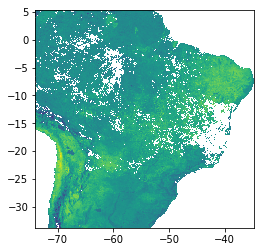

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float64',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


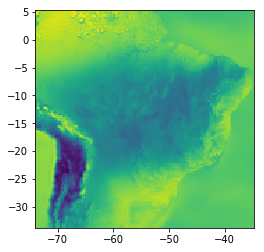

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float32',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


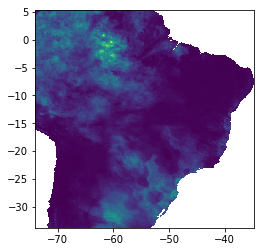

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float64',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


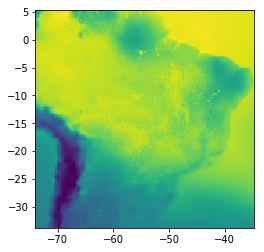

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float64',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


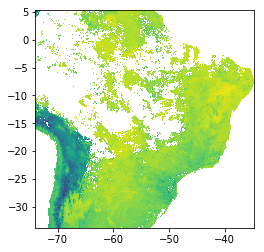

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
dtypes: ('float64',)
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


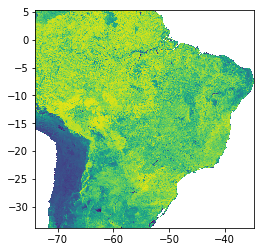

In [39]:
rasters = {}

for raster_file_path in glob(os.path.join(raster_dir_path, '*')):
    src = rasterio.open(raster_file_path)
    raster_name = raster_file_path.split(os.sep)[-1]
    display(HTML('\n<H3>%s</H3>' % raster_name))
    show_raster_info(src)

    rasters[raster_name] = src

    # plot image
    # raster_plot(src)
    rasterio.plot.show((src, 1), with_bounds=True)

## Masking a raster using a shapefile

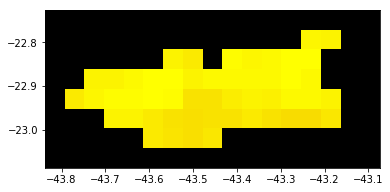

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_LST_Day_1km_2017_11_04.tif saved!


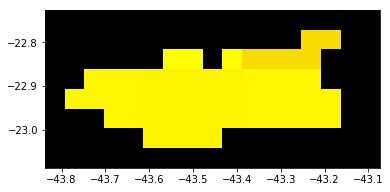

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_relative_humidity_2m_above_ground_2016_07_18.tif saved!


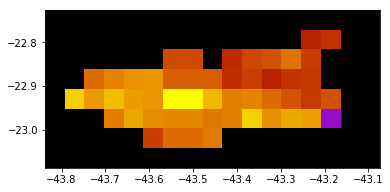

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_Precipitation_2017_10_03_354.tif saved!


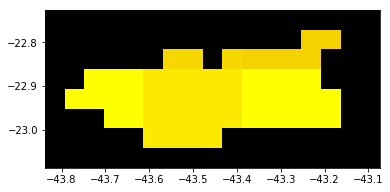

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_specific_humidity_2m_above_ground_2017_11_26.tif saved!


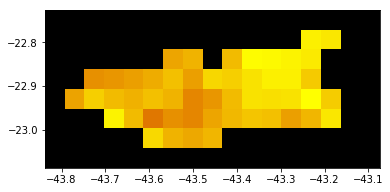

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_LST_Night_1km_2017_03_25_018.tif saved!


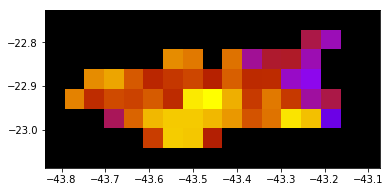

File /home/xmn/dev/AlertaDengue/AlertaDengue/tiffs/3304557_NDVI_2010_12_19.tif saved!


In [95]:
# https://mapbox.github.io/rasterio/topics/masking-by-shapefile.html
for raster_name, src in rasters.items():
    # make raster mask
    out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
    out_meta = src.meta.copy()
    
    img_type = out_image.dtype
    # cheating
    if img_type == np.float64:
        img_type = np.float64
    elif img_type == np.float32:
        img_type = np.float32
    
    out_meta.update({
        'driver': "GTiff",
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform,
        'dtype': img_type # out_images[raster_name].dtype
    })
    
    raster_new_name = '%s_%s' % (geocode, raster_name)
    
    output_path = os.path.join(raster_dir_path, raster_new_name)
    
    with rasterio.open(output_path, "w", **out_meta) as dst:
        dst.write(out_image)
        rasterio.plot.show((dst, 1), with_bounds=True, cmap='gnuplot')

    # src.close()
    print('File %s saved!' % output_path)

In [89]:
# raster_layer_bounds
# BoundingBox(
#  left=-74.02117941144857, 
#  bottom=-33.776654682894005, 
#  right=-34.76480149542548, 
#  top=5.300060176305177)
bounds = rasters['specific_humidity_2m_above_ground_2017_11_26.tif'].bounds
# leaflet bounds ex: [[40.712216, -74.22655], [40.773941, -74.12544]];
raster_layer_bounds = [[bounds[0], bounds[1]], [bounds[2], bounds[3]]]
raster_layer_bounds

[[-74.02117941144857, -33.776654682894005],
 [-34.76480149542548, 5.300060176305177]]

## Creating Mapfile for raster image

In [123]:
# mapfile templates

mapfile_template = '''
MAP
    # The geographic extent (the rectangular area covered by the map) is 
    # defined by the keyword EXTENT. The rectangular area is specified by
    # the coordinates of the opposite corners (the lower left and the upper 
    # right). These are coordinates of the southwest and the northeast corners 
    # EX:
    # EXTENT -125.00 20.00 -65.00 50.00
    # The geographic extent stretches from 125° west, 20° north to 65° west, 
    # 50° north.
    
    CONFIG 'ON_MISSING_DATA' 'IGNORE'
    CONFIG 'PROJ_LIB' './conf/'
    CONFIG      "MS_ERRORFILE" "%(ms_error_path)s"
    CONFIG      "CPL_DEBUG" "ON"
    CONFIG      "PROJ_DEBUG" "ON"
    DEBUG       5
    
    NAME        "MAP_%(mapfile_name)s"
    
    IMAGETYPE   png
    IMAGECOLOR  0 0 0
    MAXSIZE     4000
    SIZE        800 800
    UNITS       meters
    EXTENT %(extent)s
       
    OUTPUTFORMAT
      NAME      "png"
      DRIVER    AGG/PNG
      MIMETYPE  "image/png"
      IMAGEMODE RGBA
      EXTENSION "png"
      FORMATOPTION "GAMMA=0.75"
    END
    
    # OUTPUTFORMAT
    #   NAME "GTiff"
    #   DRIVER GDAL/GTiff
    #   MIMETYPE "image/tiff"
    #   IMAGEMODE RGBA
    #   EXTENSION "tif"
    # END
    
    # OUTPUTFORMAT
    #   NAME "kml"
    #   DRIVER KML
    #   MIMETYPE "application/vnd.google-earth.kml.xml"
    #   IMAGEMODE RGBA
    #   EXTENSION "kml"
    # END

    PROJECTION
        "init=%(crs_proj)s"
    END

    WEB
      METADATA
        "wms_title" "Alerta Dengue"
        "wms_onlineresource" "%(ms_cgi_path)s"
        "wms_enable_request" "*"
        "wms_srs" "%(wms_srs)s EPSG:3857"
        "labelcache_map_edge_buffer" "-10"
        # "wms_feature_info_mime_type" "text/html"
        # "wms_format" "image/png"
      END
      
      IMAGEPATH '/tmp/map/'
      IMAGEURL '/mapimg/'

    END
 
%(include_layers)s
 
END
'''

mapfile_layer_template = '''
    LAYER
        NAME         "%(city_name)s"
        DATA         "%(raster_path)s"
        STATUS       DEFAULT # ON
        TYPE         RASTER
        # OFFSITE      0 0 0
        
        TEMPLATE "conf/template.html"
        
        PROJECTION
          "init=%(crs_proj)s"
        END
        
        METADATA
          "wms_title" "%(city_name)s"
          "wms_srs" "%(wms_srs)s EPSG:3857"
          "wms_include_items" "all" 
        END
        
        CLASS
            STYLE
                COLOR '%(rgb)s'
            END
        END
        
        COMPOSITE
            OPACITY 70
        END # COMPOSITE
    END
'''

In [124]:
raster_file_name = '3304557_specific_humidity_2m_above_ground_2017_11_26.tif'
layer_name = '3304557.map'
layer_conf = {
    'geocode': geocode,
    'city_name': city_name.upper().replace(' ', '_'),
    'layer_name': layer_name,
    'rgb': '#FF9900',
    'wms_srs': wms_srs,
    'crs_proj': crs_proj,
    'raster_path': os.path.join(raster_dir_path, raster_file_name)
}

layers = [layer_conf]
include_layers = ''

# save individual layers
for layer_conf in layers:
    layer_content = mapfile_layer_template % layer_conf
    layer_relative_path = os.path.join(
        'layers/meteorological',
        'specific_humidity_2m_above_ground',
        layer_conf['layer_name']
    )
    
    layer_path = ms_mapfile_dir % layer_relative_path
    
    include_layers += (
        'INCLUDE "%s"' % layer_relative_path
    )
    
    with open(layer_path, 'w') as f:
        f.write(layer_content)

mapfile_name = 'specific_humidity_2m_above_ground.map'
mapfile_path = ms_mapfile_dir % mapfile_name

ms_config = {
    'include_layers': include_layers,
    'ms_error_path': ms_error_path,
    'ms_cgi_path': ms_cgi_path % mapfile_path,
    'shp_path': shp_path,
    'extent': '-44.8893205505 -23.3689319629 -40.9585185182 -20.763205462', # extent,
    'mapfile_name': 'specific_humidity_2m_above_ground',
    'wms_srs': wms_srs,
    'crs_proj': crs_proj
}

mapfile_content = mapfile_template % ms_config

print('Saving ', mapfile_path, 'file ...')
with open(mapfile_path, 'w') as f:
    f.write(mapfile_content)

Saving  /home/xmn/dev/AlertaDengue/AlertaDengue/mapfiles/specific_humidity_2m_above_ground.map file ...


## Visualizing the map

In [104]:
HTML('''
<script type="text/javascript">
    var extent_url = '%s';
    var crs_proj = '%s';
    var raster_layer_bounds = %s;
</script>
''' % (extent_url, crs_proj, raster_layer_bounds))

In [88]:
%%html

<div id="alerta_dengue" style="height: 400px; width: 800px;"></div>

<link rel="stylesheet" href="lib/leaflet/leaflet.css" />
<script type="text/javascript" src="lib/leaflet/leaflet.js"></script>

<script>

var mapfile_url = (
    'http://localhost:81/cgi-bin/mapserv?' + 
    'map=/var/www/mapserver/mapfiles/dengue.map&' + 
    'SERVICE=WMS&VERSION=1.1.1&REQUEST=GetMap&LAYERS=RIO_DE_JANEIRO&' +
    'STYLES=&SRS=' + crs_proj + '&BBOX=' + extent_url + '&' +
    'WIDTH=400&HEIGHT=300&FORMAT=image/png'
);

var mapfile_specific_humidity_2m_above_ground_url = (
    'http://localhost:81/cgi-bin/mapserv?' + 
    'map=/var/www/mapserver/mapfiles/specific_humidity_2m_above_ground.map&' + 
    'SERVICE=WMS&VERSION=1.1.1&REQUEST=GetMap&LAYERS=RIO_DE_JANEIRO&' +
    'STYLES=&SRS=' + crs_proj + '&BBOX=' + extent_url + '&' +
    'WIDTH=400&HEIGHT=300&FORMAT=image/png'
);

var osmUrl='http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png';
var osmAttrib = 'Map data © <a href="http://openstreetmap.org">OpenStreetMap</a> contributors';

var raster_url = '';
var raster_layer;
var geocode = '3304557';

var minZoom = 9;
var maxZoom = 11;
var zoom = 10;

//# openstreetmap
var osm = L.tileLayer(osmUrl, {
    attribution: osmAttrib,
    crs: L.CRS.EPSG4326,
    minZoom: minZoom,
    maxZoom: maxZoom
});

var baseMap = {"OSM": osm};

var map = L.map(
    'alerta_dengue', {
        //crs: L.CRS.EPSG4326,
        center: new L.LatLng(-22.9192,-43.4441),
        zoom: zoom,
        layers: [osm]
    }
); 

//# mapserver
var ms = L.tileLayer.wms(mapfile_url, {
    layers: 'RIO_DE_JANEIRO',
    format: 'image/png',
    transparent: true,
    attribution: "Info Dengue",
    srs:"EPSG:4326",
    crs: L.CRS.EPSG4326,
    minZoom: minZoom,
    maxZoom: maxZoom,
});

ms.addTo(map);

raster_dir = 'http://localhost:81/tiffs/'
raster_url = (
    raster_dir + 
    geocode + 
    '_relative_humidity_2m_above_ground_2016_07_18.tif'
);

console.log(map.getBounds());

// raster_layer_bounds = [[40.712216, -74.22655], [40.773941, -74.12544]];
// map.getBounds();
console.log(raster_layer_bounds);

raster_layer = L.imageOverlay(raster_url, raster_layer_bounds, {
    opacity: 0.5,
    interactive: true,
    attribution: 'Humidity'
});

raster_layer.addTo(map);

var overlayMaps = {
    "Rio de Janeiro": ms,
    'Relative Humidity': raster_layer
};


L.control.layers(baseMap, overlayMaps).addTo(map);

</script>